# Plots

1. ~~CDC ILInet vs WHONreVSS~~
2. ~~WHO: subtyped~~                  
3. Instability                        
4. Bryan decay      

In [1]:
%matplotlib inline

In [37]:
import matplotlib
# import seaborn as sns

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False

matplotlib.rcParams['font.family'] = "Times New Roman"

lw, fs, fc, style = 2, 20, "#f0f0f0", 'seaborn-poster'

from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [5]:
# from arlrEpiNaren.v2.src import dataUtils
import ewdate

## ILINet vs WHO NREVSS

In [7]:
# 1. CDC ILINet vs WHONrevss

ilinet = './cdc_data/2015-05-25/ILINet-national-2015-05-25.csv'
whonrevss = './cdc_data/2015-05-25/WHO_NREVSS-national-2015-05-25.csv'

In [10]:
to_date = lambda x: ewdate.EwDate.convertToDate(x)

# ILINet
cdc_net = pd.read_csv(ilinet, skiprows=1)
cdc_net['date'] = pd.to_datetime(cdc_net[['YEAR', 'WEEK']]
                                 .apply(to_date, axis=1))
cdc_net.set_index('date', inplace=True)


# WHO NREVSS
cdc_who = pd.read_csv(whonrevss,  na_values=['X', 'N/A', '', None], 
                      )
cdc_who['date'] = pd.to_datetime(cdc_who[['YEAR', 'WEEK']]
                                 .apply(to_date, axis=1))
cdc_who.set_index('date', inplace=True)

In [12]:
cdc_saved = pd.concat((cdc_net.ix['2012-08':, '% WEIGHTED ILI'],
                       cdc_who.ix['2012-08':, 'PERCENT POSITIVE']), axis=1)
cdc_saved.columns = ['ILINet', 'WHO NREVSS']
cdc_saved.name = 'CDC'

#cdc_saved.to_csv('/home/prithwi/repos/Papers/2015_How_Not/data/cdc_who_ilinet.csv')
cdc_saved.head()

,ILINet,WHO NREVSS
date,,
2012-08-05,0.925024,7.541412
2012-08-12,0.848456,6.717313
2012-08-19,1.044505,4.177449
2012-08-26,1.098600,3.058995
2012-09-02,1.220708,3.054221


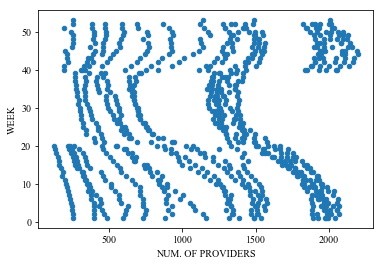

In [13]:
x = 'WEEK'
y = 'NUM. OF PROVIDERS'
cdc_net[[x, y]].plot(y=x, x=y, kind='scatter')

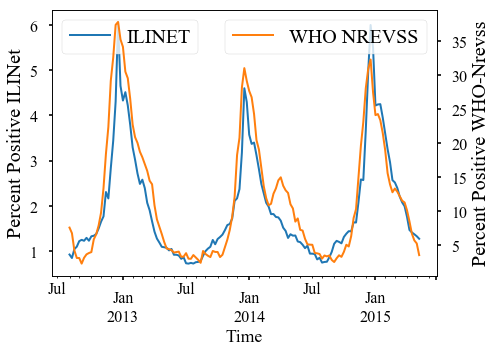

In [57]:
with plt.style.context((style)):
# with plt.style.context(('ggplot')):
    fig1, ax1 = plt.subplots(figsize=(7, 5)) #, facecolor=fc)
    #ax1.patch.set_facecolor(fc)
    cdc_net.ix['2012-08':, '% WEIGHTED ILI'].plot(ax=ax1, lw=lw)
    # ax1.set_ylim([0, 10])
    cdc_who.ix['2012-08':, 'PERCENT POSITIVE'].plot(ax=ax1, 
                                                    secondary_y=True,
                                                    lw=lw)
    
    ax1.legend(['ILINET'], loc='upper left', fontsize=fs)
    ax1.right_ax.legend(['WHO NREVSS'], loc='upper right', fontsize=fs)
    ax1.set_ylabel('Percent Positive ILINet', fontsize=fs)
    ax1.right_ax.set_ylabel('Percent Positive WHO-Nrevss', fontsize=fs)
    ax1.set_xlabel('Time')
    
    fig1.tight_layout()
    fig1.savefig('../figures/ilinet_vs_nrevss.pdf', dpi=600, 
                 facecolor=fig1.get_facecolor())

## WHO NREVSS Subtyped

In [15]:
# **************************************************************
#                   MANIPULATORS
# **************************************************************
# Get ratios
def get_ratios(X, col1='FLUA', col2='B', epsilon=1, suffix='_per'):
    """ lambda funtion to get ratios of col1 and col2 as percentage.
    """
    denom = X[col1] + X[col2] + epsilon
    num1 = ((X[col1] + epsilon)/ denom).fillna(0)
    num2 = ((X[col2] + epsilon)/ denom).fillna(0)
    return pd.DataFrame({col1+suffix: num1,
                         col2+suffix: num2})


# Get ILINET values
def get_values(X):
    """ lambda funtion to get ILINET VALUES
    """
    
    return (np.round(X['FLUA_per'] * X['ILITOTAL']),
            np.round(X['B_per'] * X['ILITOTAL']))

# ***************************************************************
#                   DATAFRAMES
# ***************************************************************
FLUA = [u'A (H1)', u'A (Unable to Subtype)', 
        u'A (H3)', u'A (Subtyping not Performed)']
cdc_who[FLUA + ['B']].astype(float, inplace=True)

who_national_df = pd.DataFrame(index=cdc_who.index)
who_national_df['FLUA'] = cdc_who[FLUA].sum(axis=1)
who_national_df['B'] = cdc_who['B'].copy()


who_national_df[['FLUA_per', 'B_per']] = get_ratios(who_national_df,
                                                    epsilon=0)[['FLUA_per', 'B_per']]

combined_df = (cdc_net.join(who_national_df[['FLUA_per', 'B_per',
                                             'FLUA', 'B']]))['2004':]

combined_df['ILI_FLUA'], combined_df['ILI_FLUB'] = zip(*combined_df.apply(get_values, axis=1)) 


In [22]:
combined_df.ix['2011-08':'2014-08', ['ILI_FLUA', 'ILI_FLUB']]

,ILI_FLUA,ILI_FLUB


In [40]:
combined_df = pd.read_csv('../data/cdc-combined-national-2015-05-25.csv', index_col=0, parse_dates=True)
combined_df.head()

,REGION TYPE,REGION,YEAR,WEEK,ILITOTAL,TOTAL PATIENTS,NUM. OF PROVIDERS,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,...,AGE 65,PERCENT POSITIVE,B,FLUA,FLUA_per,B_per,ILI_FLUA,ILI_FLUB,season,season_week
date,,,,,,,,,,,,,,,,,,,,,
2004-01-04,National,X,2004,1,7602.0,314349.0,1160.0,2.891294,2.418331,1930,...,768,12.427912,9.0,853.0,0.989559,0.010441,7523.0,79.0,2004,14
2004-01-11,National,X,2004,2,5583.0,308614.0,1141.0,2.104290,1.809056,1679,...,461,9.332841,5.0,500.0,0.990099,0.009901,5528.0,55.0,2004,15
2004-01-18,National,X,2004,3,4961.0,289774.0,1084.0,1.886956,1.712024,1721,...,360,6.006006,3.0,257.0,0.988462,0.011538,4904.0,57.0,2004,16
2004-01-25,National,X,2004,4,4436.0,287586.0,1071.0,1.776597,1.542495,1487,...,339,3.984638,3.0,163.0,0.981928,0.018072,4356.0,80.0,2004,17
2004-02-01,National,X,2004,5,4251.0,295646.0,1054.0,1.460006,1.437868,1454,...,302,2.922699,2.0,105.0,0.981308,0.018692,4172.0,79.0,2004,18


In [24]:
combined_df.columns
combined_df[[u'REGION TYPE', u'YEAR', u'WEEK', 
             u'ILITOTAL', 
             u'PERCENT POSITIVE', u'% WEIGHTED ILI', 
             u'NUM. OF PROVIDERS', 
             u'AGE 0-4', u'AGE 5-24', u'AGE 25-64', 
             u'AGE 25-49', u'AGE 50-64', u'AGE 65']]

,REGION TYPE,YEAR,WEEK,ILITOTAL,PERCENT POSITIVE,% WEIGHTED ILI,NUM. OF PROVIDERS,AGE 0-4,AGE 5-24,AGE 25-64,AGE 25-49,AGE 50-64,AGE 65
date,,,,,,,,,,,,,
2004-01-04,National,2004,1,7602.0,12.427912,2.891294,1160.0,1930,2299,2605,X,X,768
2004-01-11,National,2004,2,5583.0,9.332841,2.104290,1141.0,1679,1857,1586,X,X,461
2004-01-18,National,2004,3,4961.0,6.006006,1.886956,1084.0,1721,1604,1276,X,X,360
2004-01-25,National,2004,4,4436.0,3.984638,1.776597,1071.0,1487,1543,1067,X,X,339
2004-02-01,National,2004,5,4251.0,2.922699,1.460006,1054.0,1454,1448,1047,X,X,302
2004-02-08,National,2004,6,3824.0,1.841360,1.377869,986.0,1420,1297,889,X,X,218
2004-02-15,National,2004,7,3691.0,1.785714,1.305323,1004.0,1301,1255,876,X,X,259
2004-02-22,National,2004,8,2916.0,1.484955,1.086911,948.0,956,1038,719,X,X,203
2004-02-29,National,2004,9,2744.0,0.678989,0.991888,894.0,925,910,682,X,X,227


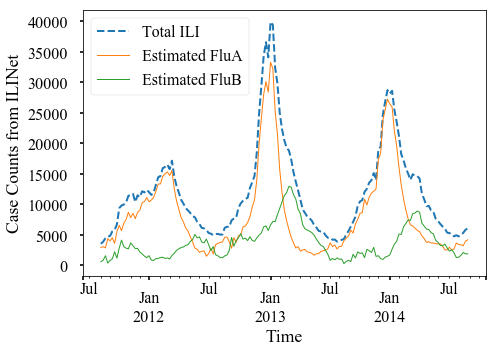

In [54]:
with plt.style.context(('seaborn-poster')):
    #fig2, ax2 = plt.subplots(figsize=(8, 5), facecolor=fc)
    fig2, ax2 = plt.subplots(figsize=(7, 5)) #, facecolor=fc)
    # ax2.patch.set_facecolor(fc)
    
    combined_df.ix['2011-08': '2014-08', ['ILITOTAL']].fillna(0).plot(ax=ax2, lw=lw, 
                                                                      style='--')
    combined_df.ix['2011-08':'2014-08', ['ILI_FLUA', 'ILI_FLUB']].fillna(0).plot(ax=ax2, lw=1)
    
    ax2.legend(['Total ILI', 'Estimated FluA', 'Estimated FluB'], loc='best')
    ax2.set_ylabel('Case Counts from ILINet')
    ax2.set_xlabel('Time')
    
    fig2.tight_layout()
    fig2.savefig('../figures/ilinet_subtyped.pdf', dpi=600, 
                 facecolor=fig2.get_facecolor())

# Instability


## Description of mat file

Pejman says

> First col. is week id (year and epi-week)  
> Second col. shows when the update has been generated (1 means 1st week of 2013)  
> 3rd and 4th col. are ILI and N_muestras.

## Strategy for now

Steps:

1. `groupby` date index
2. For each group find the max N_weeks : stable data
3. Calculate `q-score` , `relative_error`
4. `groupby` update sequence
5. plot

In [34]:
from scipy.io import loadmat

In [30]:
paho_seq = loadmat('./paho_countries.mat')

act_countries = ['Argentina', 'Bolivia', 'Chile', 'Colombia',
                 'Costa Rica', 'Ecuador', 'El Salvador',
                 'Guatemala', 'Honduras', 'Mexico',
                 'Nicaragua', 'Panama', 'Paraguay', 'Peru']

pejman_countries = ['argentina', 'bolivia', 'chile', 'colombia', 'costa_rica',
                    'ecuador', 'elsalvador', 'guatemala', 'honduras', 'mexico',
                    'nicaragua', 'panama', 'paraguay', 'prue']

with pd.ExcelWriter('/home/prithwi/repos/Papers/2015_How_Not/data/PAHO_2013-10-10.xlsx') as writer:
    for ct, p_ct in zip(act_countries, pejman_countries):
        df = pd.DataFrame(paho_seq[p_ct])
        df.columns = ['Date', 'N_weeks', 'ILI', 'N_muestras']
        df.ILI = df.ILI.astype(float)
        df.to_excel(writer, ct)

In [44]:
def return_scores(individual_group, eps=.00001):
    tmp = individual_group.copy()
    final_value = tmp.sort_values('N_weeks').iloc[-1, :]['ILI']
    final_value = final_value + eps
    tmp['qs'] = tmp.ILI.apply(lambda x: 4 * (1 - np.abs(x - final_value)/ np.max((x, final_value, 10))))
    tmp['rel_err'] = (tmp.ILI - final_value) / final_value 
    tmp['abs_rel_err'] = tmp['rel_err'].abs()
    # tmp.drop_duplicates(inplace=True)
    return tmp

paho_seq = loadmat('./paho_countries.mat')

act_countries = ['Argentina', 'Bolivia', 'Chile', 'Colombia',
                 'Costa Rica', 'Ecuador', 'El Salvador',
                 'Guatemala', 'Honduras', 'Mexico',
                 'Nicaragua', 'Panama', 'Paraguay', 'Peru']

pejman_countries = ['argentina', 'bolivia', 'chile', 'colombia', 'costa_rica',
                    'ecuador', 'elsalvador', 'guatemala', 'honduras', 'mexico',
                    'nicaragua', 'panama', 'paraguay', 'prue']

inst_dict = dict()

for ct, p_ct in zip(act_countries, pejman_countries):
    df = pd.DataFrame(paho_seq[p_ct])
    df.columns = ['Date', 'N_weeks', 'ILI', 'N_muestras']
    df.ILI = df.ILI.astype(float)
    
    groups = df.groupby('Date')
    scored_df = pd.DataFrame()
    
    for name, group in df.groupby('Date', as_index=False):
        scored_df = pd.concat((scored_df, return_scores(group)))
    
    instability = scored_df.groupby('N_weeks').agg({"qs": np.nanmean, "rel_err": np.nanmean,
                                                "abs_rel_err": np.nanmean})
    inst_dict.setdefault(ct, instability)
    print "Done for ", ct

Done for  Argentina
Done for  Bolivia
Done for  Chile
Done for  Colombia
Done for  Costa Rica
Done for  Ecuador
Done for  El Salvador
Done for  Guatemala
Done for  Honduras
Done for  Mexico
Done for  Nicaragua
Done for  Panama
Done for  Paraguay
Done for  Peru


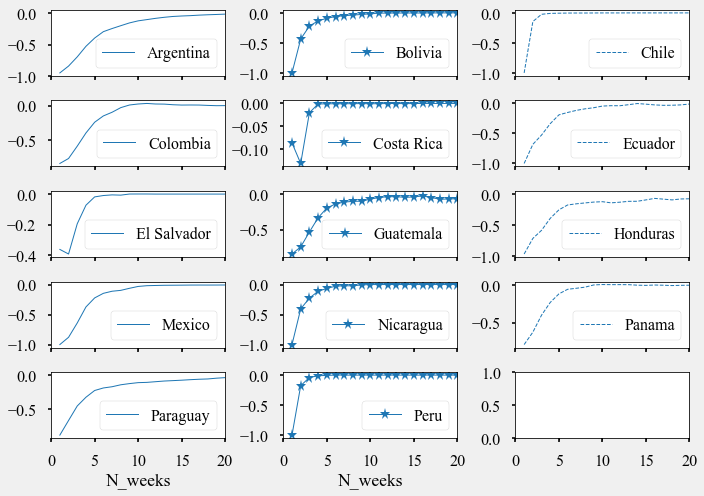

In [45]:
with plt.style.context((style)):
    colors = [matplotlib.cm.jet(1.* i / len(act_countries)) 
              for i in xrange(len(act_countries))]
    
    styles = ['-', '-*', '--']
    
    fig3, ax3 = plt.subplots(5, 3, figsize=(10, 7), facecolor=fc, sharex=True)
    # ax3.patch.set_facecolor(fc)
    
    for idx, ct in enumerate(act_countries):
        ax = ax3.flatten()[idx]
        inst_dict[ct]['rel_err'].plot(ax=ax, lw=1.0, # color=colors[idx],
                                      style=styles[idx % len(styles)])
        ax.legend([ct], loc='lower right')
        ax.set_xlim([0, 20])
    
    #ax3.legend(act_countries, loc='right')
    #ax3.set_ylabel('Avg. Relative Error')
    #ax3.set_xlabel('Number of Updates')
    #ax3.set_xlim([0, 30])
    
    fig3.tight_layout()
    #fig3.savefig('ili_updates.png', dpi=300, 
    #             facecolor=fig3.get_facecolor())

/Users/pchakraborty/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/pchakraborty/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:1326: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0. Returning /Users/pchakraborty/Library/Python/3.6/lib/python/site-packages/matplotlib/mpl-data/fonts/afm/phvr8an.afm
  UserWarning)


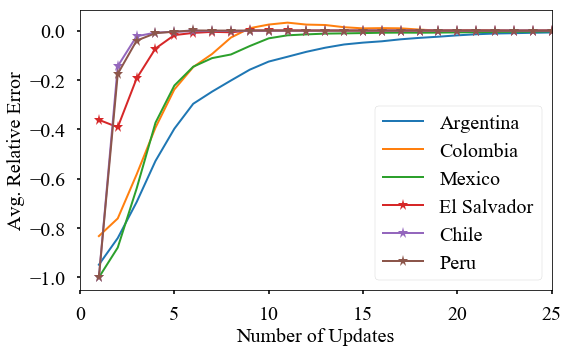

In [52]:
selected_countries = ['Argentina', 'Colombia', 'Mexico', 
                      'El Salvador', 'Chile', 'Peru']

with plt.style.context((style)):
    fig4, ax4 = plt.subplots(figsize=(8, 5)) #, facecolor=fc)
    #ax4.patch.set_facecolor(fc)
    
    styles = ['-', '-*']
    for idx, ct in enumerate(selected_countries):
        inst_dict[ct]['rel_err'].plot(ax=ax4, lw=lw, fontsize=fs,
                                     style=styles[ idx // 3])
        
    
    ax4.legend(selected_countries, loc='lower right', fontsize=fs)
    ax4.legend(selected_countries, loc='lower right', fontsize=fs)
    ax4.set_ylabel('Avg. Relative Error', fontsize=fs)
    ax4.set_xlabel('Number of Updates', fontsize=fs)
    ax4.set_xlim([0, 25])
    
    fig4.tight_layout()
    fig4.savefig('../figures/ili_updates.pdf', dpi=600, 
                 facecolor=fig4.get_facecolor())

# CDC Surveillance Drop

In [21]:
def find_season(row):
    """Function to find seasons and corresponding epi weeks.
    
    TODO: Expand to class
    """
    year = row['YEAR']
    ew = row['WEEK']
    try:
        if row['WEEK'] >= 40:
            season = year + 1
            season_week = ew - 40 + 1
        else:
            season = year
            season_week = (dataUtils.ewDate.convertToDate((year, ew)) 
                           -dataUtils.ewDate.convertToDate((year - 1, 40))).days / 7
    except Exception as e:
        print row
        raise Exception(e)
    return season, season_week    

In [22]:
cdc_net['season'], cdc_net['season_week'] = zip(*cdc_net.apply(find_season, axis=1))

selected_cdc = cdc_net.query('season in [2010, 2011, 2012, 2013, 2014]')
selected_cdc.head()

,REGION TYPE,REGION,YEAR,WEEK,ILITOTAL,TOTAL PATIENTS,NUM. OF PROVIDERS,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,AGE 25-64,AGE 25-49,AGE 50-64,AGE 65,season,season_week
date,,,,,,,,,,,,,,,,,
2009-10-04,National,X,2009,40,48420,855346,2056,6.069229,5.660867,9302,27406,X,8554,2255,903,2010,1
2009-10-11,National,X,2009,41,58196,853912,2134,7.094668,6.815222,11527,32585,X,10271,2800,1013,2010,2
2009-10-18,National,X,2009,42,69068,906536,2162,7.715102,7.618892,13187,39364,X,12399,3048,1070,2010,3
2009-10-25,National,X,2009,43,66411,898860,2167,7.551344,7.388359,13174,36860,X,12166,3083,1128,2010,4
2009-11-01,National,X,2009,44,57017,899425,2197,6.671178,6.339272,12161,30860,X,10250,2672,1074,2010,5


In [28]:
dataUtils.ewDate.convertToDate((2008, 1))

datetime.date(2007, 12, 30)

In [64]:
span_size = 4
avg_providers = selected_cdc.groupby('season_week').agg({'NUM. OF PROVIDERS': 'mean'})
smooth_providers = pd.ewma(avg_providers, span=span_size)

In [70]:
provider_summary = pd.DataFrame(index=smooth_providers.index)
provider_summary['average'] = smooth_providers
provider_summary['grad2'] = np.gradient(np.gradient(smooth_providers.values.flatten()))
provider_summary['grad2sign'] = np.sign(provider_summary['grad2'])
provider_summary['inflect'] =  pd.rolling_sum(provider_summary['grad2sign'], 
                                              window=span_size).shift(-span_size + 1)

# Inflection point = first point where you get a sum of span_size
inflection_point = provider_summary[provider_summary['inflect'] == span_size].index[0]
print inflection_point, provider_summary.ix[inflection_point, :]

33 average      1570.850752
grad2           2.007773
grad2sign       1.000000
inflect         4.000000
Name: 33, dtype: float64


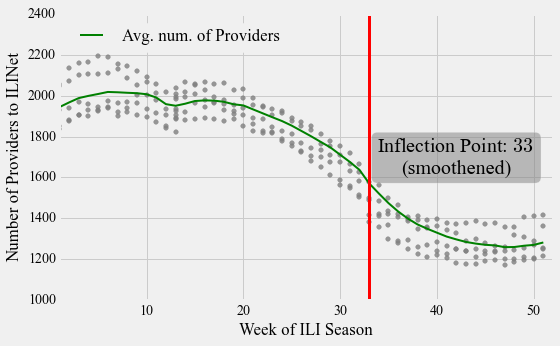

In [120]:
with plt.style.context(('fivethirtyeight')):
    fig5, ax5 = plt.subplots(figsize=(8,5))
    x_data = 'season_week'
    y_data = 'NUM. OF PROVIDERS'
    selected_cdc[[x_data, y_data]].plot(x=x_data, y=y_data,
                                        kind='scatter', ax=ax5,
                                        #alpha=0.5, color='green')
                                        alpha=0.8, color='grey')
    # avg_providers.plot(ax=ax5, lw=lw)
    smooth_providers.plot(ax=ax5, lw=lw, color='green', 
                          legend=False)
    ax5.axvline(inflection_point, lw=1.5 * lw, color='red')
    # pd.rolling_mean(avg_providers, window=4).plot(ax=ax5, lw=lw)
    ax5.legend(['Avg. num. of Providers'], loc='upper left')
    ax5.text(inflection_point + 9, 
             smooth_providers.ix[inflection_point] + 50,
             "Inflection Point: ${}$ \n(smoothened)".format(inflection_point),
             fontsize=20, ha='center',
             bbox=dict(boxstyle='round', alpha=0.5, facecolor='grey')
             )
             
    ax5.set_xlim([1, 52])
    ax5.set_ylabel('Number of Providers to ILINet')
    ax5.set_xlabel('Week of ILI Season')
    
    fig5.tight_layout()
    fig5.savefig('ili_surveillance_drop.png', dpi=600, 
                 facecolor=fig5.get_facecolor())